In [44]:
import pandas as pd

In [45]:
df_raw = pd.read_csv('./Data_Processed_All_Contractors_Characteristics - Data.csv')

In [46]:
df_raw.shape

(5046, 71)

In [47]:
columns_list = list(df_raw.columns)

In [48]:
df_raw.columns

Index(['Dealer ID', 'Converted State-AL', 'Converted State-AR',
       'Converted State-CA', 'Converted State-FL', 'Converted State-GA',
       'Converted State-IL', 'Converted State-IN', 'Converted State-KY',
       'Converted State-LA', 'Converted State-MI', 'Converted State-MO',
       'Converted State-NC', 'Converted State-NJ', 'Converted State-OH',
       'Converted State-Others', 'Converted State-PA', 'Converted State-SC',
       'Converted State-TN', 'Converted State-TX', 'employeebucket-NA',
       'employeebucket-4~8', 'employeebucket-<4', 'employeebucket->8',
       'No. of Employees', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Gibson 18.Column3', 'Hitting Potential 16.Column3',
       'JS 16.Column3', 'JS 17.Column3', 'JS 18.Colu

In [49]:
def find_index(name):
    index_num = columns_list.index(name)
    print(index_num)

In [50]:
find_index('applied 2016')

55


In [51]:
df_2016 = df_raw.loc[df_raw['registed 2016'] == 1]

In [52]:
df_2016.shape

(1473, 71)

In [53]:
df_2016_xy = df_2016.iloc[:,:56].drop(['Dealer ID','No. of Employees','registed 2016','JS 17.Column3','JS 18.Column3','JS 19.Column3','NON USER 17.Column3','NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3'],axis=1)

In [54]:
df_2016_xy.isnull().any()

Converted State-AL                          False
Converted State-AR                          False
Converted State-CA                          False
Converted State-FL                          False
Converted State-GA                          False
Converted State-IL                          False
Converted State-IN                          False
Converted State-KY                          False
Converted State-LA                          False
Converted State-MI                          False
Converted State-MO                          False
Converted State-NC                          False
Converted State-NJ                          False
Converted State-OH                          False
Converted State-Others                      False
Converted State-PA                          False
Converted State-SC                          False
Converted State-TN                          False
Converted State-TX                          False
employeebucket-NA                           False


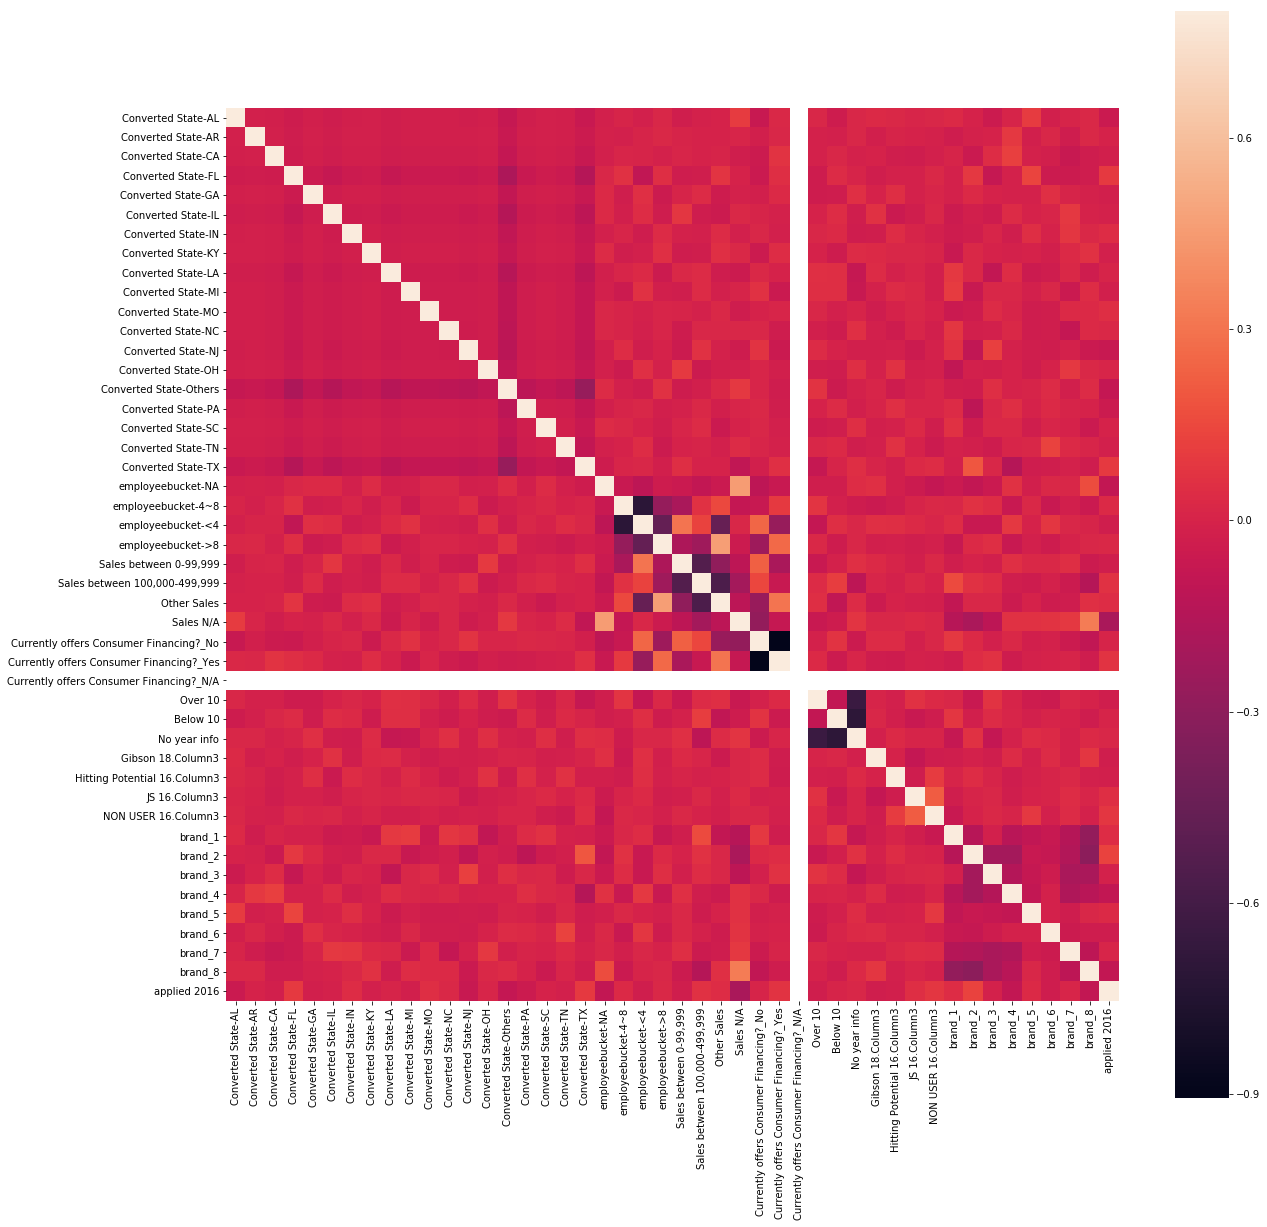

In [15]:
corr = df_2016_xy.corr()
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

In [16]:
df_2016_xy.head()

,Converted State-AL,Converted State-AR,Converted State-CA,Converted State-FL,Converted State-GA,Converted State-IL,Converted State-IN,Converted State-KY,Converted State-LA,Converted State-MI,...,NON USER 16.Column3,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,applied 2016
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [17]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
x = df_2016_xy.iloc[:,:45]
y = df_2016_xy.iloc[:,45].astype(int)
# scaler = StandardScaler()
# x_std = scaler.fit_transform(x)
def svm(x_std, y, test = 0.3, kernel_name='rbf', c_base = 2, gamma_base = 2,grid_cv_num = 5):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test)
    svc = SVC(kernel=kernel_name, class_weight = 'balanced')
    c_range = np.logspace(-2,4,10,base=c_base)
    gamma_range = np.logspace(-2,4,10,base=gamma_base)
    param_grid = [{'kernel':[kernel_name],'C':c_range,'gamma':gamma_range}]
    grid = GridSearchCV(svc,param_grid,cv=grid_cv_num,n_jobs=-1,verbose=1)
    clf = grid.fit(x_train,y_train)
    print("Best: %f using %s" % (clf.best_score_,clf.best_params_))
    pred = clf.predict(x_test)
    matrix = confusion_matrix(y_test, pred, labels=None, sample_weight=None)
    score = grid.score(x_test,y_test)
    print('accuracy:{}'.format(score))
    return pred,matrix

In [19]:
pred,matrix = svm(x,y,0.2,'linear')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.8s finished


Best: 0.576401 using {'C': 0.25, 'gamma': 0.25, 'kernel': 'linear'}
accuracy:0.5728813559322034


In [20]:
pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1])

In [21]:
confusion_matrix_1 = pd.DataFrame(matrix,columns=['pred_true','pred_false'],index=['real_true','real_false'])

In [22]:
confusion_matrix_1

,pred_true,pred_false
real_true,78,64
real_false,62,91


In [55]:
import lightgbm as lgb
import gc
import time
from datetime import datetime
import warnings
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [56]:
df_target = df_2016_xy['applied 2016']
features = [c for c in df_2016_xy.columns if c not in ['applied 2016']]
categorical_feats = [c for c in df_2016_xy.columns if c != 'applied 2016']

In [40]:
# def lgb_cv(max_depth,
#           num_leaves,
#           min_data_in_leaf,
#           feature_fraction,
#           bagging_fraction,
#           lambda_l1):
#     folds = KFold(n_splits=5, shuffle=True, random_state=15)
#     oof = np.zeros(df_train.shape[0])
#     for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_target.values)):
#         print("fold n°{}".format(fold_))
#         trn_data = lgb.Dataset(df_train.iloc[trn_idx][features],
#                                label=df_target.iloc[trn_idx],
#                                categorical_feature=categorical_feats
#                               )
#         val_data = lgb.Dataset(df_train.iloc[val_idx][features],
#                                label=df_target.iloc[val_idx],
#                                categorical_feature=categorical_feats
#                               )
#         param = {
#             'num_leaves': int(num_leaves),
#             'min_data_in_leaf': int(min_data_in_leaf), 
#             'objective':'regression',
#             'max_depth': int(max_depth),
#             'learning_rate': 0.005,
#             "boosting": "rf",
#             "feature_fraction": feature_fraction,
#             "bagging_freq": 1,
#             "bagging_fraction": bagging_fraction ,
#             "bagging_seed": 11,
#             "metric": 'rmse',
#             "lambda_l1": lambda_l1,
#             "verbosity": -1
#         }
    
#         clf = lgb.train(param,
#                         trn_data,
#                         10000,
#                         valid_sets = [trn_data, val_data],
#                         verbose_eval=500,
#                         early_stopping_rounds = 200)
        
#         oof[val_idx] = clf.predict(df_train.iloc[val_idx][features],
#                                    num_iteration=clf.best_iteration)
#         del clf, trn_idx, val_idx
#         gc.collect()
        
#     return accuracy(oof, df_target)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [69]:
param = {
            'num_leaves': 123,
            'min_data_in_leaf': 148, 
            'objective':'binary',
            'max_depth': 9,
            'learning_rate': 0.005,
            "boosting": "rf",
            "feature_fraction": 0.7197,
            "bagging_freq": 1,
            "bagging_fraction": 0.9463,
            "bagging_seed": 11,
            "metric": 'auc',
            "lambda_l1": 5.044,
            "random_state": 11,
            "verbosity": -1
        }

In [75]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(x_train))
predictions = np.zeros(len(x_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, y_train.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(x_train.iloc[trn_idx][features],
                           label=y_train.iloc[trn_idx],
                           categorical_feature=categorical_feats
                          )
    val_data = lgb.Dataset(x_train.iloc[val_idx][features],
                           label=y_train.iloc[val_idx],
                           categorical_feature=categorical_feats
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(x_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(x_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(accuracy_score(oof, y_train)))

fold n°0
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.5	valid_1's auc: 0.5


C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[200]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
fold n°1
Training until validation scores don't improve for 200 rounds.


C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[100]	training's auc: 0.55505	valid_1's auc: 0.50762
[200]	training's auc: 0.55505	valid_1's auc: 0.50762
Early stopping, best iteration is:
[18]	training's auc: 0.55505	valid_1's auc: 0.50762
fold n°2


C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.5	valid_1's auc: 0.5
[200]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
fold n°3


C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.5	valid_1's auc: 0.5
[200]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
fold n°4


C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\wuziy\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.5	valid_1's auc: 0.5
[200]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [74]:
oof

array([0.        , 0.        , 0.        , ..., 0.03048408, 0.        ,
       0.        ])

# Number of Employee as Numerical Variable

In [23]:
df_2016_employee = df_2016.dropna()

In [24]:
df_2016_employee.shape

(1458, 71)

In [25]:
df_2016_employee_xy = df_2016_employee.iloc[:,:56].drop(['Dealer ID','registed 2016','JS 17.Column3','JS 18.Column3','JS 19.Column3','NON USER 17.Column3','NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3','Gibson 18.Column3','employeebucket-NA','employeebucket-4~8','employeebucket-<4','employeebucket->8'],axis=1)

In [26]:
df_2016_employee_xy.columns

Index(['Converted State-AL', 'Converted State-AR', 'Converted State-CA',
       'Converted State-FL', 'Converted State-GA', 'Converted State-IL',
       'Converted State-IN', 'Converted State-KY', 'Converted State-LA',
       'Converted State-MI', 'Converted State-MO', 'Converted State-NC',
       'Converted State-NJ', 'Converted State-OH', 'Converted State-Others',
       'Converted State-PA', 'Converted State-SC', 'Converted State-TN',
       'Converted State-TX', 'No. of Employees', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Hitting Potential 16.Column3', 'JS 16.Column3',
       'NON USER 16.Column3', 'brand_1', 'brand_2', 'brand_3', 'brand_4',
       'brand_5', 'brand_6', 'brand_7', 'brand_8', 'applied 2016'],
      dtype='object')

In [27]:
for i in df_2016_employee_xy.columns.values:
    if df_2016_employee_xy.isnull().any()[i] == 'True':
        print(i)

In [28]:
df_2016_employee_xy.shape

(1458, 42)

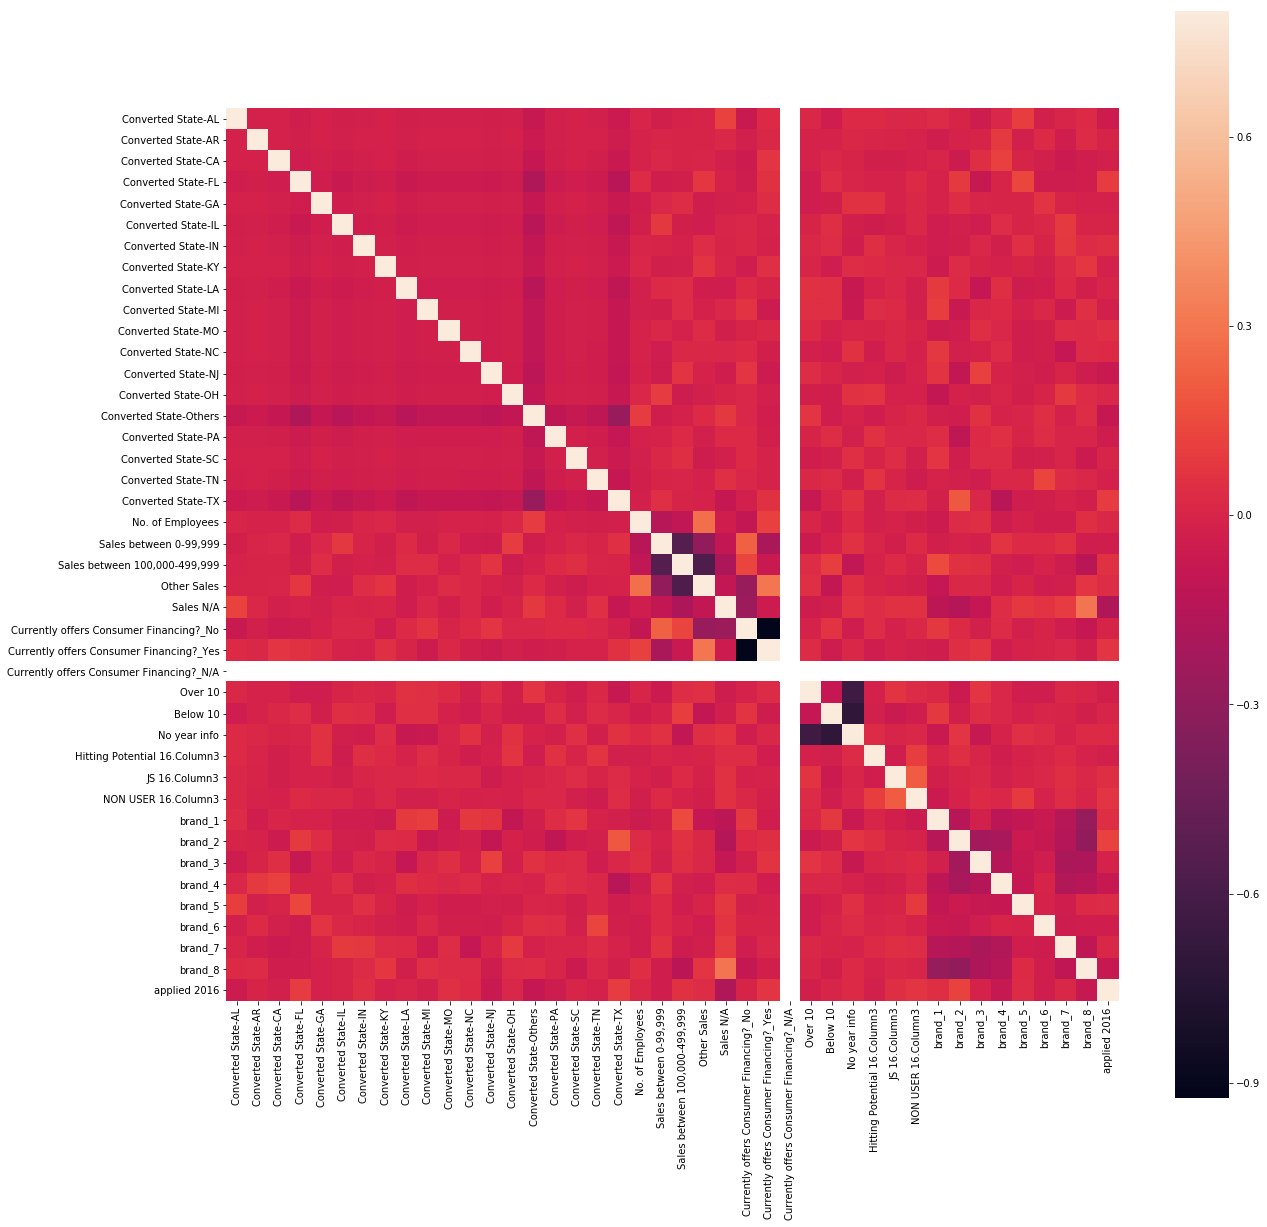

In [29]:
corr = df_2016_employee_xy.corr()
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

In [30]:
x = df_2016_employee_xy.iloc[:,:41]
y = df_2016_employee_xy.iloc[:,41].astype(int)
# scaler = StandardScaler()
# x_std = scaler.fit_transform(x)
def svm(x_std, y, test = 0.3, kernel_name='rbf', c_base = 2, gamma_base = 2,grid_cv_num = 5):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test)
    svc = SVC(kernel=kernel_name, class_weight = 'balanced')
    c_range = np.logspace(-2,5,10,base=c_base)
    gamma_range = np.logspace(-2,5,10,base=gamma_base)
    param_grid = [{'kernel':[kernel_name],'C':c_range,'gamma':gamma_range}]
    grid = GridSearchCV(svc,param_grid,cv=grid_cv_num,n_jobs=-1,verbose=1)
    clf = grid.fit(x_train,y_train)
    print("Best: %f using %s" % (clf.best_score_,clf.best_params_))
    pred = clf.predict(x_test)
    matrix = confusion_matrix(y_test, pred, labels=None, sample_weight=None)
    score = grid.score(x_test,y_test)
    print('accuracy:{}'.format(score))
    return pred,matrix

In [31]:
pred,matrix = svm(x,y,0.2,'linear')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


Best: 0.578045 using {'C': 0.25, 'gamma': 0.25, 'kernel': 'linear'}
accuracy:0.5547945205479452


In [32]:
confusion_matrix_2 = pd.DataFrame(matrix,columns=['pred_true','pred_false'],index=['real_true','real_false'])

In [33]:
confusion_matrix_2

,pred_true,pred_false
real_true,76,69
real_false,61,86


In [34]:
precision =  78/(78+61)
recall = 78/(78+71)
F1 = 2*(78)/(2*78+61+71)

In [35]:
F1

0.5416666666666666

In [36]:
import lightgbm as lgb
import gc
import time
from datetime import datetime
import warnings
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error